In [1]:
#Maria J. Molina, National Center for Atmospheric Research
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pygrib
from netCDF4 import Dataset
from wrf import getvar, get_basemap, latlon_coords
from matplotlib.colors import ListedColormap
import seaborn as sns
from itertools import product
from matplotlib import path
import geopandas as gpd
import shapely
from matplotlib.patches import Polygon
#import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import matplotlib.patches as patches
from descartes import PolygonPatch

In [7]:
#grab basemap projection
file1_wrf_d01 = '/glade/scratch/molina/wrf4km_ens_2/wrfout_d01_2017-01-15_09:00:00'
ncfile1_wrf_d01 = Dataset(file1_wrf_d01)
while True:
    p = np.array([0])
    if len(p) == 1:
        try: 
            p = getvar(ncfile1_wrf_d01, "pressure")
        except ValueError:
            continue
    if len(p) != 1:
        print('WRF file opened...')
        break
#y, x = latlon_coords(p)
p_subset = p[:, 0:450:, ::]
bm = get_basemap(p_subset)

WRF file opened...


In [8]:
#grab the grib files

#grbs_orig = pygrib.open('/storage/timme1mj/Build_WRF/DATA/NARR_GRIB/merged_AWIP32.2017012109')
#grb_org = np.array([grb for idx,grb in enumerate(grbs_orig) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs1 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/muregion_cooler/muregion_cooler_2017012109_2.grb')
grb1 = np.array([grb for idx,grb in enumerate(grbs1) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs2 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/gomplume_cooler/gomplume_cooler_2017012109_2.grb')
grb2 = np.array([grb for idx,grb in enumerate(grbs2) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs3 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/gombasin_cooler/gombasin_cooler_2017012109_2.grb')
grb3 = np.array([grb for idx,grb in enumerate(grbs3) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs4 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/muregion_cooler/muregion_cooler_2017012109_1.grb')
grb4 = np.array([grb for idx,grb in enumerate(grbs4) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs5 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/gomplume_cooler/gomplume_cooler_2017012109_1.grb')
grb5 = np.array([grb for idx,grb in enumerate(grbs5) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs6 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/gombasin_cooler/gombasin_cooler_2017012109_1.grb')
grb6 = np.array([grb for idx,grb in enumerate(grbs6) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs7 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/muregion_warmer/muregion_warmer_2017012109_1.grb')
grb7 = np.array([grb for idx,grb in enumerate(grbs7) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs8 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/gomplume_warmer/gomplume_warmer_2017012109_1.grb')
grb8 = np.array([grb for idx,grb in enumerate(grbs8) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs9 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/gombasin_warmer/gombasin_warmer_2017012109_1.grb')
grb9 = np.array([grb for idx,grb in enumerate(grbs9) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs10 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/muregion_warmer/muregion_warmer_2017012109_2.grb')
grb10 = np.array([grb for idx,grb in enumerate(grbs10) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs11 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/gomplume_warmer/gomplume_warmer_2017012109_2.grb')
grb11 = np.array([grb for idx,grb in enumerate(grbs11) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

grbs12 = pygrib.open('/glade/work/molina/DATA/NARR_GRIB/gombasin_warmer/gombasin_warmer_2017012109_2.grb')
grb12 = np.array([grb for idx,grb in enumerate(grbs12) if grb.marsParam=='11.131' and grb.typeOfLevel=='surface'])[0]

In [9]:
import matplotlib as mpl

#cmap = ListedColormap(sns.cubehelix_palette(16, start=.5, rot=-.75).as_hex())

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.cm.get_cmap('Reds',20)
cmap = truncate_colormap(cmap, 0.1, 1.0)

In [10]:
file_1 = grb1.values
file_2 = grb2.values
file_3 = grb3.values
file_4 = grb4.values
file_5 = grb5.values
file_6 = grb6.values
file_7 = grb7.values
file_8 = grb8.values
file_9 = grb9.values
file_10 = grb10.values
file_11 = grb11.values
file_12 = grb12.values

In [11]:
latlon = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/narr_skin_casestudy.nc')
y = latlon.coords['lat'].values
x = latlon.coords['lon'].values
x, y = bm(x,y)

In [12]:
#gom basin region
patches_gom = []
can = gpd.GeoDataFrame.from_file("/glade/work/molina/DATA/ocean_shapefiles/World_Seas_WGS84.shp")
gom = can[can['NAME']=='Gulf of Mexico']
studyarea = shapely.geometry.box(bm.llcrnrlon, bm.llcrnrlat, 
                                 bm.urcrnrlon, bm.urcrnrlat)
selection = gom[gom.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(bm, poly)
        patches_gom.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(bm, poly)
            patches_gom.append(PolygonPatch(mpoly))
    else:
        print(poly, ' is neither a polygon nor a multi-polygon. Skipping it.')

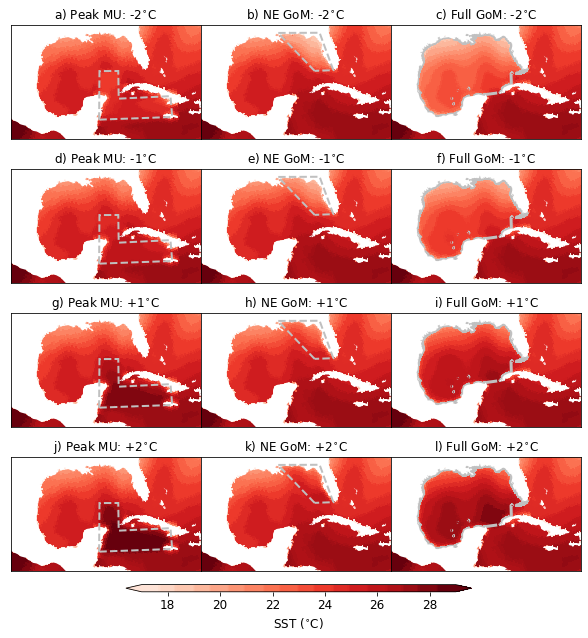

In [14]:
##############################################################################  
##############################################################################  
##############################################################################  


fig = plt.figure(figsize=(8.,8.))


##############################################################################  


ax1 = fig.add_axes([0.0, 0.77, 0.33, 0.25])

ax1.set_title("a) Peak MU: -2$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)
#bm.drawparallels(np.arange(int(20),int(31),5),labels=[1,0,0,0], linewidth=0., fontsize=12) 

CS1 = bm.pcolormesh(x,y,file_1-273.15,vmin=17,vmax=29,cmap=cmap)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='silver', ls='--', lw=2.0, alpha=1.0)
ax1.add_patch(patch_mu)


##############################################################################  


ax2 = fig.add_axes([0.33, 0.77, 0.33, 0.25])

ax2.set_title("b) NE GoM: -2$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)

CS2 = bm.pcolormesh(x,y,file_2-273.15,vmin=17,vmax=29,cmap=cmap)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='silver', ls='--', lw=2.0, alpha=1.0)
ax2.add_patch(patch_plume)


##############################################################################  


ax3 = fig.add_axes([0.66, 0.77, 0.33, 0.25])

ax3.set_title("c) Full GoM: -2$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)

CS3 = bm.pcolormesh(x,y,file_3-273.15,vmin=17,vmax=29,cmap=cmap)

ax3.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='silver', ls='--', lw=3.0, alpha=1.0, zorder=1))


##############################################################################  


ax4 = fig.add_axes([0.0, 0.52, 0.33, 0.25])

ax4.set_title("d) Peak MU: -1$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)
#bm.drawparallels(np.arange(int(20),int(36),5),labels=[1,0,0,0], linewidth=0., fontsize=12) 

CS4 = bm.pcolormesh(x,y,file_4-273.15,vmin=17,vmax=29,cmap=cmap)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='silver', ls='--', lw=2.0, alpha=1.0)
ax4.add_patch(patch_mu)


##############################################################################  


ax5 = fig.add_axes([0.33, 0.52, 0.33, 0.25])

ax5.set_title("e) NE GoM: -1$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)

CS5 = bm.pcolormesh(x,y,file_5-273.15,vmin=17,vmax=29,cmap=cmap)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='silver', ls='--', lw=2.0, alpha=1.0)
ax5.add_patch(patch_plume)


##############################################################################  


ax6 = fig.add_axes([0.66, 0.52, 0.33, 0.25])

ax6.set_title("f) Full GoM: -1$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)

CS6 = bm.pcolormesh(x,y,file_6-273.15,vmin=17,vmax=29,cmap=cmap)

ax6.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='silver', ls='--', lw=3.0, alpha=1.0, zorder=1))


##############################################################################  


ax7 = fig.add_axes([0.0, 0.27, 0.33, 0.25])

ax7.set_title("g) Peak MU: +1$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)
#bm.drawparallels(np.arange(int(20),int(36),5),labels=[1,0,0,0], linewidth=0., fontsize=12) 

CS7 = bm.pcolormesh(x,y,file_7-273.15,vmin=17,vmax=29,cmap=cmap)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='silver', ls='--', lw=2.0, alpha=1.0)
ax7.add_patch(patch_mu)


##############################################################################  


ax8 = fig.add_axes([0.33, 0.27, 0.33, 0.25])

ax8.set_title("h) NE GoM: +1$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)

CS8 = bm.pcolormesh(x,y,file_8-273.15,vmin=17,vmax=29,cmap=cmap)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='silver', ls='--', lw=2.0, alpha=1.0)
ax8.add_patch(patch_plume)


##############################################################################  


ax9 = fig.add_axes([0.66, 0.27, 0.33, 0.25])

ax9.set_title("i) Full GoM: +1$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)
 
CS9 = bm.pcolormesh(x,y,file_9-273.15,vmin=17,vmax=29,cmap=cmap)

ax9.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='silver', ls='--', lw=3.0, alpha=1.0, zorder=1))


##############################################################################  


ax10 = fig.add_axes([0.0, 0.02, 0.33, 0.25])

ax10.set_title("j) Peak MU: +2$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)
#bm.drawparallels(np.arange(int(20),int(36),5),labels=[1,0,0,0], linewidth=0., fontsize=12) 
#bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

CS10 = bm.pcolormesh(x,y,file_10-273.15,vmin=17,vmax=29,cmap=cmap)

verts_mu = [
           (bm(-88., 18.)),  # left, bottom
           (bm(-88., 25.0)),  # left, top
           (bm(-85., 25.0)),  # right, top
           (bm(-85., 21.0)),
           (bm(-77., 21.0)),
           (bm(-77., 18.0)),
            (0.,0.)
            ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_mu = Path(verts_mu, codes)
patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='silver', ls='--', lw=2.0, alpha=1.0)
ax10.add_patch(patch_mu)


##############################################################################  


ax11 = fig.add_axes([0.33, 0.02, 0.33, 0.25])

ax11.set_title("k) NE GoM: +2$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)
#bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12) 

CS11 = bm.pcolormesh(x,y,file_11-273.15,vmin=17,vmax=29,cmap=cmap)

verts_plume = [
               (bm(-84., 25.)),  # left, bottom
               (bm(-90., 30.5)),  # left, top
               (bm(-83., 30.5)),  # right, top
               (bm(-81., 25.)),  # right, bottom
               (0., 0.),  # ignored
                ]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path_plume = Path(verts_plume, codes)
patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='silver', ls='--', lw=2.0, alpha=1.0)
ax11.add_patch(patch_plume)


##############################################################################  


ax12 = fig.add_axes([0.66, 0.02, 0.33, 0.25])

ax12.set_title("l) Full GoM: +2$^{\circ}$C", fontsize=12)

#bm.drawcoastlines()
#bm.drawcountries()
#bm.drawstates()
bm.fillcontinents(color='w', lake_color=None, ax=None, zorder=None, alpha=None)
#bm.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12) 

CS12 = bm.pcolormesh(x,y,file_12-273.15,vmin=17,vmax=29,cmap=cmap)

ax12.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='silver', ls='--', lw=3.0, alpha=1.0, zorder=1))


##############################################################################  


cbar_ax = fig.add_axes([0.2, 0.01, 0.6, 0.0125])
ticks_1 = [18,20,22,24,26,28]
tick_1 = ['18','20','22','24','26','28']
cbar = fig.colorbar(CS12, cax=cbar_ax, ticks=ticks_1, orientation='horizontal', extend='both')
cbar.ax.set_xticklabels(tick_1)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('SST ($^{\circ}$C)', fontsize=12) 


##############################################################################  


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig2_lowdpi.png', bbox_inches='tight', pad_inches=0.075,dpi=200)
plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig2.png', bbox_inches='tight', pad_inches=0.075,dpi=1200)
plt.show()
plt.close()


##############################################################################  
##############################################################################  
##############################################################################  